<a href="https://colab.research.google.com/github/luiscardon/Labo-II-2023/blob/main/vara_1D_DF_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **vara-1D-DF-0.ipynb**

El programa *vara-1D-DF-0.ipypy* resuelve la ecuación de Poisson en una dimensión sujeta a condiciones de borde de Dirichlet.
\begin{equation}
\frac{d^2T}{dx^2} + S=0
\end{equation}
con
\begin{equation}
T(x=0)=T_0 \quad \quad \quad T(x=L)=T_L
\end{equation}


Se ha creado con propósito educativo. Se ha hecho énfasis en ir incorporando sucesivamente los distintos cálculos necesarios aprovechando la capacidad del notebook de ir ejecutándolos, probándolos y comentándolos paso a paso, de la misma manera que un programador debería proceder para crear su propio programa, paso a paso y siempre sobre seguro.

Las partes o tareas se han  programado como funciones y   se ha ejecutado y probado inmediatamete.

El programa no es particularmpente **pytónico**, y se ha programado como se pudiera haberlo hecho en C. En los siguientes ejemplos veremos como aprovechar al máximo las capacidades de python.

Una descripción de la estructura del programa (que es independiente de como se lo haya programado)  se puede leer  en el libro Métodos Numéricos... de Cardon

Este modo de trabajo, hacer y probar, debe usarse siempre.

El programa completo se dispone bajo el mismpo nombre en la plataforma.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Generación de la red de discretización


Empezaremos definiendo:

N:      Número total de nodos

L:      Longitud del dominio de cálculo

dx:     paso de la discretización

T:      variable dependiente asociada a cada nodo

T[0]:   primer elemento del vector T

T[N-1]: último elemento del vector T

Crearemos una función para generar un vector con las posiciones de los nodos correspondientes a una red uniforme

In [ ]:
N=11
L=1
dx=L/(N-1)
print(N,L,dx)

11 1 0.1


In [ ]:
def genera_red(N,dx):
    '''Calcula la posición de los nodos para una
       red uniforme
       N= numero total de nodos
       '''
    x=[]
    for i in range(N):
      x.append(i*dx)
    return(x)
x=genera_red(N,dx)
print("x",x)

x [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


Crearemos dos funciones para asignar valores a la conductividad y a la fuente.
Estas fuenciones se pueden modificar para asignar distribuciones de conductividad y fuentes distintas

In [ ]:
def fuente_nodal(N,valor):
    """ Programe aqui el valor local de la fuente"""
    S=np.full(N,valor)
    return S
def conductividad_nodal(N,valor):
    """ Programe aqui el valor local de la fuente"""
    k=np.full(N,valor)
    return k
kk=1
SS=100
k=conductividad_nodal(N,kk)
print("k",k)
S=fuente_nodal(N,SS)
print("S",S)

k [1 1 1 1 1 1 1 1 1 1 1]
S [100 100 100 100 100 100 100 100 100 100 100]


Crearemos un vector para la variable dependiente y definiremos las condiciones de borde

In [ ]:
T=np.zeros(N)
print("T",T)

# Condiciones de borde de Dirichlet T[0] es TB0 y T[N-1] es TBL
T0 = 10.
TL = 10.
T[0]=T0
T[N-1]=TL
print("T",T)

T [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[10.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]


Hasta aqui todo bién. Hemos verificado que todos los vectores creados tengan el número de elementos  dispuesto, N, N=11 en este caso.
Podemos plotear nuestra condición inicial

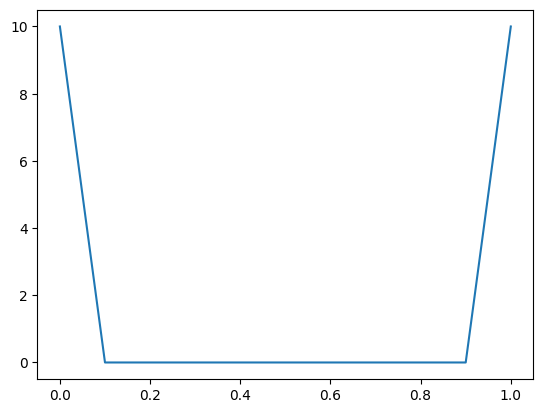

In [ ]:
plt.plot(x,T)

Chequeamos visualmente que las condiciones de borde ocurren para x=0 y x=1, están en los valores adecuados. Los valores seteados para la variable dependiente en el interior del dominio están también en el valor especificado. Como las condiciones de borde son simétricas con respecto al centro del dominio de cálculo, la solución también deberá ser simétrica.

Los problemas más obvios que hubieran podido ocurrir se han evitado.
Estos problemas generalmente ocurren al indexar, por menos o por más los  vectores involucrados. Usualmente ocurre al acceder a los últimos elementos del vector.

Podemos y debieramos chequear S y k, que en este caso deben dar dos constantes.
Por último podemos  pasar a calcular los coeficientes de la matriz de discretización.


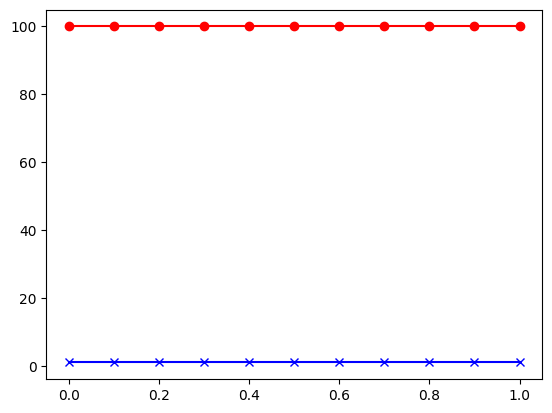

In [ ]:
plt.plot(x,k, "xb-",  x,S,"or-")

# Generación de la matriz de coeficientes.
\begin{equation}
AT=b
\end{equation}
La haremos en dos pasos,
1) Sin tener en cuenta los bordes
2) Modificando para tener en cuenta los bordes

In [ ]:
def coeficientes(N,dx,k,S,T):

    '''
    Genera las diagonales de la matriz de discretización y su correspondiente
    término fuente   que resulta de de la discretización por diferencias finitas
    de la ecuación de conducción de calor 1D con una fuente, con
    condiciones de borde de Dirichlet.

    Los coeficientes:
    a: diagonal princial
    b: diagonal superior
    c: diaginal inferir
    d: término independiente
    Los coeficientes se calculan positivos.
    Para respetar la regla de coeeficientes positivos de Patankar,
    el signo que resulta en su forma matricial en el caso de DF,
    se tiene en cuenta en la función tdm.

    N numero total de nodos (desde la posición 0 a la posición N-1)
    primer nodo (de borde) i=0
    ultimo nodo (de borde) i=N-1
    ultima ecuacion: i=N-2
'''


    #Calculo de la Matriz de Coeficientes
    #Primera parte:  Coeficientes nodos 1 a N-2
    a=np.zeros(N)
    b=np.zeros(N)
    c=np.zeros(N)
    d=np.zeros(N)
    dxdx=dx*dx
    for i in range(1,N-1):
      b[i] = 1.;
      a[i] = 2.;
      c[i] = 1.;
      d[i] =  S[i] * dxdx/k[i]

    return (a,b,c,d)

a,b,c,d=coeficientes(N,dx,k,S,T)
print("a",a)
print("b",b)
print("c",c)
print("d",d)


a [0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.]
b [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
c [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
d [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


Observe que para N nodos totales, solo se dben calcular los N-2 nodos internos, por esos los ceros antes y después de los valores distintos mostrados.
Los valores del vector d contienen la información aportada por la fuente. Ahora  debemos modificarlos para incorporar las condiciones de borde.

In [ ]:

def bordesDirichlet(N,b,c,d,T):
    #Segunda parte: introducción de las condiciones de borde
    #En los nodos internos al lado de los bordes
    d[1]   =  d[1] + c[1]*T[0] ;
    d[N-2] =  d[N-2] + b[N-2]*T[N-1] ;

    #Solo para la impresion final de la matriz tridiagonal
    c[1]=0.
    b[N-2]=0.
    return (b,c,d)
bordesDirichlet(N,b,c,d,T)
print("a",a)
print("b",b)
print("c",c)
print("d",d)


a [0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0.]
b [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
c [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
d [ 0. 11.  1.  1.  1.  1.  1.  1.  1. 11.  0.]


Tal vez es más facil de verlo en columnas

In [33]:
print("N=",N)
print("Coeficientes despues de CB")
print("c  ","a  ","b  ","d  ","S  ","T")
for i in range(N):
    print(c[i],a[i],b[i],d[i],S[i],T[i])


N= 11
Coeficientes despues de CB
c   a   b   d   S   T
0.0 0.0 0.0 0.0 100 10.0
0.0 2.0 1.0 11.0 100 0.0
1.0 2.0 1.0 1.0000000000000002 100 0.0
1.0 2.0 1.0 1.0000000000000002 100 0.0
1.0 2.0 1.0 1.0000000000000002 100 0.0
1.0 2.0 1.0 1.0000000000000002 100 0.0
1.0 2.0 1.0 1.0000000000000002 100 0.0
1.0 2.0 1.0 1.0000000000000002 100 0.0
1.0 2.0 1.0 1.0000000000000002 100 0.0
1.0 2.0 0.0 11.0 100 0.0
0.0 0.0 0.0 0.0 100 10.0


In [34]:
  print("N=",N)
  print("Coeficientes después de CB")
  print('{}    {}      {}   {}    {}     {}     {}'.format("i" , "c  ","a  ","b  ","d  ","S  ","T"))
  for i in range(N):
      print('{}   {:2.2f}   {:2.2f}  {:2.2f}   {:4.2f}   {:3.2f}   {:3.2f}'.format(i, c[i],a[i],b[i],d[i],S[i],T[i]))


N= 11
Coeficientes despues de CB
i    c        a     b      d       S       T
0   0.00   0.00  0.00   0.00   100.00   10.00
1   0.00   2.00  1.00   11.00   100.00   0.00
2   1.00   2.00  1.00   1.00   100.00   0.00
3   1.00   2.00  1.00   1.00   100.00   0.00
4   1.00   2.00  1.00   1.00   100.00   0.00
5   1.00   2.00  1.00   1.00   100.00   0.00
6   1.00   2.00  1.00   1.00   100.00   0.00
7   1.00   2.00  1.00   1.00   100.00   0.00
8   1.00   2.00  1.00   1.00   100.00   0.00
9   1.00   2.00  0.00   11.00   100.00   0.00
10   0.00   0.00  0.00   0.00   100.00   10.00


Verifique que entiende bien la estructura de estos vectores, principalmente los vectors c,a,b y d. Por qué el primero y último de los elemntos de los vectores a,b,c,y d son cero? Porqué aparecen dos ceros al comienzo de c, o dos ceros al final de b.
Por que  la suma de los elementos de c y b deben dar a.
Evalúe a mano y compruebe el valor de d para d[1) y d[N-2].
Considere por qué el primer y último elemnto  de S está valuado como los demás. ¿Tiene importancia?

Resolución.
Para resolver necesitamos un solver. Este es la función tdm  acontinuación.

In [35]:
def tdm(N, a, b, c, d, u):
    '''Algortitmo de Thomas.
     Todos los coeficientes entrados positivos,
     notación de Patankar:
     ap u_i = ae u_i+1 + ao u_i-1 + b
     N= numero de ecuaciones
     tdm(N, ap, ae, ao, b, u)
     resultados desde u(1) a u(N)
     condiciones de borde: en u(0) y u(N+1)'''

    p=np.zeros(N+2)
    q=np.zeros(N+2)

    p[1] = b[1] / a[1]
    q[1] = d[1] / a[1]
    for i in range(2,N+1):
        p[i] = b[i] / (a[i] - c[i] * p[i-1])
        q[i] = (d[i] + c[i] * q[i-1]) / (a[i] - c[i] * p[i-1])

    u[N] = q[N]
    for i in range(N-1,0,-1):
        u[i] = p[i] * u[i+1] + q[i]
    return (u)


Llamamos a la función tdm. El primer argumento se refiere al número de ecuaciones que corresponden al número  de nodos internos.

In [36]:
T=tdm(N-2, a, b, c, d, T)
print("T",T)

T [10.  14.5 18.  20.5 22.  22.5 22.  20.5 18.  14.5 10. ]


Observer y verifique que en los extremos se cumplen las condiciones de borde y que el vector es simétrico.
Si no lo fuera habría que sospechar algun problema.
Ahora podemos plotear la solución.

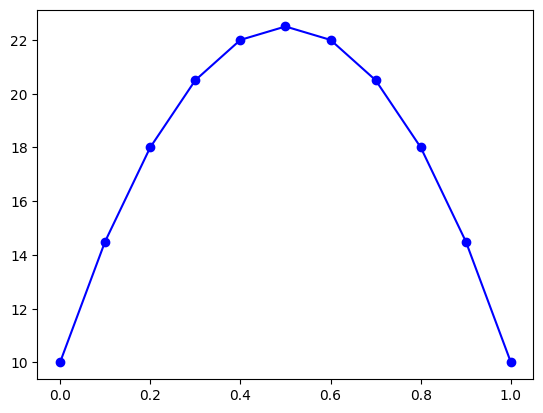

In [38]:
plt.plot(x,T, "ob-")

Nuevamente chequamos el cumplimeinto de las condiciones de borde y la simetría del problema. Vemos que el valor máximo ocurre para el centro del dominio de cálculo.

In [55]:

def sol_analitica(xx,SS,L,T0,TL,kk):
  return T0 + (TL-T0)*xx/L + SS*L*L*(xx/L -xx*xx/(L*L))/(2*kk)

print(SS,L,T0,TL,kk)
print(sol_analitica(0,SS,L,T0,TL,kk))



100 1 10.0 10.0 1
10.0


In [58]:
Ta=np.zeros(N)
for i in range(N):
  Ta[i]=sol_analitica(x[i],SS,L,T0,TL,kk)
print(x)
print(T)
print(Ta)


[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
[10.  14.5 18.  20.5 22.  22.5 22.  20.5 18.  14.5 10. ]
[10.  14.5 18.  20.5 22.  22.5 22.  20.5 18.  14.5 10. ]


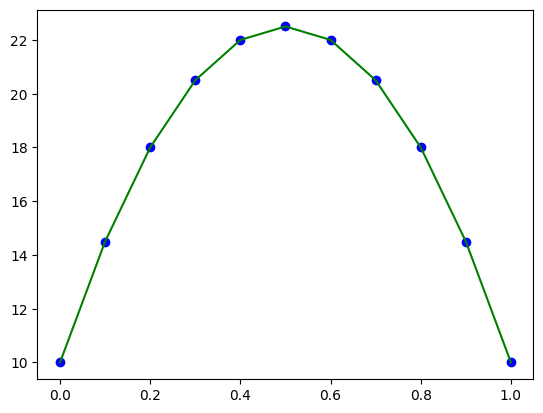

In [59]:
plt.plot(x,T,"ob",x,Ta,"g-")